# Neural networks and deep learning

URL: http://neuralnetworksanddeeplearning.com/index.html

# Chapter 1: Recognizing handwritten digits

## Perceptrons

* A type of artificial neuron
* Takes in some binary inputs, and has a binary output
* The output (0 or 1) is determined by the weighted sum of the inputs being greater than some threshold ($\sum_j w_jx_j$ > thresold)

E.g., there is a music concert. We think of 3 features:

1. Do I like the music?
2. Is it far?
3. Is it expensive?

We assign an important to all of these (weights), and then take a weighted sum. If it's over some value, I go to the concert.

Now, we could update the definition of the peceptron a bit. If we moved the threshold to the other side of the equation and think of it instead as a bias, we something more familiar:

$w\cdot{x} + bias > 0$, then output 1 (where $w\cdot{x}$ is our weighted sum).

Conceptually, the bias can be thought of as how easy it is to get the perceptron to activate.

## Sigmoid neurons

Imagine we are designing a network to learn handwriting recognition, and we want to tweak our weights to improve it.
Well, what we want is for a small change in any weight (or bias) to result in only a small change to our output.

The problem with perceptrons is that a small change in any weight or bias can cause the output to flip from 0 to 1, and that can then cause another perceptron to flip from 0 to 1, etc. So even a small change can have a big effect.

So we use another kind of neuron: __the sigmoid neuron__.
Sigmoid neurons are like perceptrons, but a key property is that a small change to a weight or bias only results in a small change to the output.

* Sigmoid neurons and cake in any value between 0-1
* Their output is $\sigma(w\cdot{x}+b)$
* The output will also be any number between 0-1

$\sigma$ is the function that squishes values into 0-1. A.k.a, the _logistic function_. Due to this alternate terminology, sigmoid neurons are sometimes called _logistic neurons_.

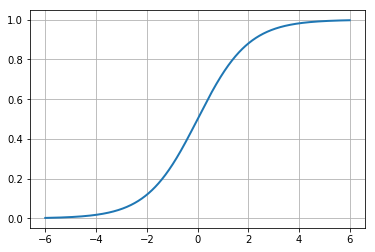

In [6]:
# The sigmoid function aka logistic function
# Sigmoid will be close to 0 when -ve, and close to 1 when +ve
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    # Apply sigmoid activation function
    return 1/(1+np.exp(-z))

test_input = np.arange(-6, 6, 0.01)
plt.plot(test_input, sigmoid(test_input), linewidth=2)
plt.grid(1)

Note how the sigmoid function looks like a smoothed out binary step function, where anything > 0 becomes one. So we can kinda think of a sigmoid neuron as a "smoothed out" perceptron.

_Note: Sigmoid is a common activation function, but there are others._


## The architecture of neural networks

* __Feedforward neural networks__: The output from one neuron becomes the input to another. Information always go forward -- there is no feedback/loops.

* Input layer
* Output layer
* Hidden layer (any layer which is not an input or output layer)


## A simple network to classify handwritten digits

To classify a string of digits, we must do 2 things:

1. Split the string into individual digits (_segmentation_)
2. Classify each digit

We'll focus on 2.

The network will be structured as follows:

1. Input layer: 784 neurons, one for each pixel in a 28*28 pixel image. Each input is the grayscale value of a neuron, where 0.0 = white and 1.0 = black
2. A hidden layer containing _n_ neurons
3. A 10 neuron output layer. If the output of the first neuron is ~1, then the network thinks the input digit is a 1, etc. I.e., we check for the highest-valued neuron in this layer to see which digit has been recognized.

<img src="images/neural_net_deep_learning/net1.jpg" width="450">


## Learning with gradient descent

Use $x$ to denote a training input (i.e., grayscale image of a character).
Each training input can be thought of as a 28x28 = 784 dimensional vector. Each entry in the vector represents the grayscale value for a pixel in the image.

We'll denote the output as $y=y(x)$ where y is a 10 dimensional vector.
For example, if training image $x$ denotes a 6, then $y(x) = (0, 0, 0, 0, 0, 0, 1, 0, 0, 0)^T$. (Note the $^T$ just denotes transforming the row vector into a column vector.)

Now, we want to find all the weights and biases that for any given input will give us our desired output.

To measure how well we're doing, we'll define a __cost function__ (aka _loss_ or _objective_ function).

* Cost function: A function that measures how accurate your function is

Here is our cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

* $w$ = all weights
* $b$ = all biases
* $x$ = input
* $n$ = number of training inputs
* $a$ = vector of outputs (since this is the output, it depends on $x$, $y$, and $b$

$\parallel{v}\parallel$ denotes the length of a vector.

We'll call C the _quadratic cost function_, aka, _Mean Squared Error_ or just _MSE_ function.

Things to note:

* The value will always be positive since we $^2$ the difference
* The value will be close to 0 when $y(x)$ and $a$ are almost equal
* I.e., the closer the function is to 0, the better our network is working

So, we want to find a set of weights and biases that make the cost function as low as possible.

The algorithm for finding the weights and biases that make the cost function as low as possible is known as __gradient descent__.

For now, forget about the network, sigmoid, etc., etc., and just focus on how we can minimize a function using gradient descent.

Let's just imagine a surface defined by 2 variables. We want to move down the surface until we reach the bottom, and then we know which two variables _minimize_ the function.

<img src="images/neural_net_deep_learning/multivarfunc.jpg" width="450">

In the diagram above, what happens when we move the ball some small amount $\Delta{v1}$ in the $v1$ direction, and some small amount $\Delta{v2}$ in the $v2$ direction? According to calculus:

$\Delta{C} = \frac{\delta{C}}{\delta{v_1}}\Delta{v_1} + \frac{\delta{C}}{\delta{v_2}}\Delta{v_2}$


The change in C = the change in C with respect to V1 * the change in V1 + the change in C with respect to V2 * the change in V2

We want to choose $\Delta{v_1}$ and $\Delta{v_2}$ so as to make C negative -- to move down our slope/minimize our cost function.

(Hint: Recall that the gradient of a function -- all of the partial derivatives stuffed into a vector -- gives you the slope of steepest ascent.)

Let's define:

$\Delta{v} = (\Delta{v_1}, \Delta{v_2})^T$ = the column vector of changes to the $v$ variables

$\nabla{C} = (\frac{\delta{C}}{\delta{v_1}}, \frac{\delta{C}}{\delta{v_2}})^T$ = gradient of C = the column vector of partial derivatives

Recall $\nabla$ tells you something is a gradient vector -- a vector of partial derivatives.

Anyway, this let's us rewrite:

$\Delta{C} = \nabla{C}\cdot{\Delta{v}}$

Or in English: the change in C is given by the gradient of C * the change in directions.

So, to move "down" the function -- the reduce our cost -- we just need to choose $v$ such that:

$v \to v' = v-\eta{\nabla{C}}$, where $\eta$ (eta) is some small, positive parameter (known as the __learning rate__).

In other words, we multiply the gradient by some negative step/learning rate to move down a certain amount, and take that away from our current position (input variables -- our weights and biases) to move down.

In other other words, we repeatedly compute the gradient of C, then move down in the _opposite_ direction until we reach the bottom of our function.

Note that this will still work even if we have more than 2 variables in $v$.

We must be careful to choose a learning rate (step) that is not too big (could overshoot 0 and end up +ve), or too small (could be too slow and we'd never reach 0).

__To sum up__:
Gradient descent is taking small steps in the direction which does the most to immediately decrease C.

## Gradient descent in neural networks

The idea is to use gradient descent to find the weights $w_k$ and biases $b_l$ that will minimize our cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

In other words, our position $v$ will be replaced by the weights and biases. Restating the rule for gradient descent in these terms, we get:

$w_k \to w'_k = w_k - \eta\frac{\delta{C}}{\partial{w_k}}$

$b_l \to b'_l = b_l - \eta\frac{\delta{C}}{\partial{b_l}}$

### Problem
Take another look at the cost function:

$C(w,b) = \frac{1}{2n} \displaystyle\sum_x \parallel{y(x)-a}\parallel^2$

It is an average of the differences for all the training inputs: you add up all the differences for every training input, and then divide them by 1/2n.

This means we need to computer gradients for each training input and then average them, which might take a long time when there is so much training data.

### Solution
__Stochastic gradient descent__ can speed up the learning.

The idea: Estimate the gradient $\nabla{C}$ by computing it for a small sample of training inputs. By averaging for this small sample, we can quickly get a good estimate of the true gradient, which speeds things up.

